# Accelerometer playground
This playground was initially developed by James G to see the affects of noise on position estimation using dead reckoning. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

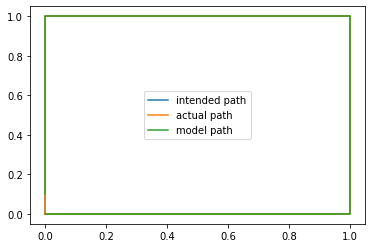

In [28]:
sigma_accel = 0.0
sigma_pos = 0.0

stop_points = [[0,0], [0,1], [1,1], [1,0], [0,0]]

intended_path_X, intended_path_Y = [], []
steps_per = 10

for i in range(len(stop_points) - 1):
    pt1 = stop_points[i]
    pt2 = stop_points[i+1]
    X_ = np.linspace(pt1[0], pt2[0], steps_per + 1)
    Y_ = np.linspace(pt1[1], pt2[1], steps_per + 1)
    
    for x, y in zip(X_,Y_):
        intended_path_X.append(x)
        intended_path_Y.append(y)
        
intended_path_X = np.array(intended_path_X)
intended_path_Y = np.array(intended_path_Y)
        
walk_noise_X = np.random.normal(0,sigma_pos,len(intended_path_X))
walk_noise_Y = np.random.normal(0,sigma_pos,len(intended_path_Y))

actual_path_X = intended_path_X + walk_noise_X
actual_path_Y = intended_path_Y + walk_noise_Y

veloc_true_X = np.diff(actual_path_X)
veloc_true_Y = np.diff(actual_path_Y)

accel_true_X = np.diff(veloc_true_X)
accel_true_Y = np.diff(veloc_true_Y)

accel_true_X = np.insert(accel_true_X, 0, veloc_true_X[0])
accel_true_Y = np.insert(accel_true_Y, 0, veloc_true_Y[0])

def generate_candidate_path(accel_true_X, accel_true_Y):
    
    accel_noise_X = np.random.normal(0,sigma_accel,len(accel_true_X))
    accel_noise_Y = np.random.normal(0,sigma_accel,len(accel_true_Y))

    accel_model_X = accel_true_X + accel_noise_X
    accel_model_Y = accel_true_Y + accel_noise_Y

    veloc_model_X = np.cumsum(accel_model_X)
    model_path_X = np.cumsum(veloc_model_X)

    veloc_model_Y = np.cumsum(accel_model_Y)
    model_path_Y = np.cumsum(veloc_model_Y)
    
    return model_path_X, model_path_Y




plt.plot(intended_path_X, intended_path_Y, label = 'intended path')
plt.plot(actual_path_X, actual_path_Y, label = 'actual path')

for i in range(1):
    model_path_X, model_path_Y = generate_candidate_path(accel_true_X, accel_true_Y)
    plt.plot(model_path_X, model_path_Y, label = 'model path')
plt.legend()
plt.show()